In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing. Your goal is to understand what factors make a car more or less expensive. As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

Data Preparation Steps

Dropped Fields:
Removed id, VIN, region, and state.

Created car_age:
Generated a new field based on the year of the car.

Dropped Incomplete Rows:
Removed rows missing all feature columns.

Median Imputation for Price:
Found that using the "median" rather than the "mean" for price = 0 increased the Mean Squared Error (MSE).

Imputation Strategies:
Used "most frequent" for categorical and "mean" for numeric features.

Removed Outliers:
Removed outliers outside the normal distribution to improve the MSE score.

Logarithmic Visualization:
Changed to a logarithmic scale for better visualizations.

Modeling and Feature Selection
Evaluated Models:

Compared the MSE, R², and cross-validation scores for Ridge, Linear, and Lasso Regression.

Selected Ridge Regression as Linear and Ridge had the same scores.

Poly Features:
Assessed the impact of making car_age and odometer polynomial/interactive features, but found no improvement in the MSE score.

Cross-Validation:
Utilized CrossGridCSV for model validation.

Feature Importance:
Employed Random Forest to double-check feature importance.

Performance Metrics:

Mean Squared Error (MSE):
Training Data: 0.35
Test Data: 0.35
The MSE values for both training and test data are identical, suggesting the model performs consistently well on both known and unseen data.

R² Score:
Training Data: 0.65
Test Data: 0.65
An R² score of 0.65 indicates that approximately 65% of the variance in the price can be explained by the features included in the model. This suggests a moderately strong fit.

Cross-Validation Mean MSE: 0.35
The consistency between the test MSE and cross-validation mean MSE further indicates the model’s reliability and generalizability.Major Factors: Car Age (-0.289454) and Odometer (-0.179888) are the most significant features negatively impacting the car price, which aligns with typical expectations on car deprecation. 

Minor Factors: Other features such as Model, Title Status, Cylinders, and Fuel have very small coefficients, indicating that they have much less influence on the car price compared to Car Age and Odometer.

Model (0.000063) has the hightest positive coeffient but is a much smaller impact that car age and odometer. 


In [ ]:
Recommendations:
Focus on Car Age and Odometer:
Since these are the most significant factors, emphasize cars with lower ages and odometer readings in marketing and valuation.

Highlight Model and Title Status:
While their impact is smaller, features like Model and Title Status still contribute positively and can be used as selling points.

Consider Regional Data:
Adding back regional information might provide deeper insights and improve model performance.

Continuous Monitoring:
Regularly update the model with new data 

Summary:
I've analyzed the data to help understand what consumers value in used cars. I took several key steps in preparing the data, including dropping non-essential fields like id, VIN, region, and state. This helps streamline the dataset, though adding regional information back could be an interesting future exercise.

I also created a new car_age field, which essentially calculates the age of the car based on its year. I made sure to remove rows that were missing all feature columns to keep the data clean and accurate. Interestingly, I found that using the median for price imputation rather than the mean increased the Mean Squared Error (MSE), so I went with the median. My strategy for handling missing data involved using the "most frequent" values for categorical features and the "mean" for numeric features. Outliers were removed to improve the model’s accuracy, and I adopted a logarithmic scale for better visualization of the results.

When it came to modeling and feature selection, I compared the Mean Squared Error (MSE), R², and cross-validation scores across Ridge, Linear, and Lasso Regression models. Since Ridge and Linear Regression performed equally well, I selected Ridge Regression. I also assessed the impact of making car_age and odometer polynomial or interactive features but found no significant improvement in the MSE score. I used CrossGridCSV for model validation and employed Random Forest to double-check feature importance.

Now, let’s talk about the results. The MSE values for both training and test data were 0.35, suggesting that the model performs consistently well on both known and unseen data. The R² score of 0.65 indicates that approximately 65% of the variance in the price can be explained by the features included in the model, which is quite strong. The consistency between the test MSE and cross-validation mean MSE further supports the model’s reliability and generalizability.

The major factors negatively impacting car prices were Car Age and Odometer. This aligns with common expectations, as older cars and those with higher mileage generally sell for less. Other features like Model, Title Status, Cylinders, and Fuel had much smaller coefficients, indicating they have less influence on the price. Among these, the Model feature had the highest positive coefficient but its impact was minimal compared to Car Age and Odometer.

Moving forward, I recommend focusing on car age and odometer readings in your marketing and valuation strategies, as these are the most significant factors influencing car prices. Highlighting attributes like the car model and title status can also add value, even if their impact is smaller. Consider adding regional data back into the mix for a deeper analysis. For example we could further review if the placement of the dealership has an influence on prices. Lastly, it's crucial to continuously update the model with new data to stay aligned with market trends and consumer preferences and we should revisit when new data is avialable. 

In [ ]:
############## Code Selections below ########################

In [2]:
#Final this version looks at three models and prints the best

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import TargetEncoder
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data 
data_path = 'data/vehicles.csv'
vehicles_unique_data = pd.read_csv(data_path)

# Drop 'id', 'VIN', 'region', and 'state' columns
vehicles_unique_data = vehicles_unique_data.drop(['id', 'VIN', 'region', 'state'], axis=1)

# Create new feature 'car_age_unique'
current_year_unique = datetime.datetime.now().year
vehicles_unique_data['car_age_unique'] = current_year_unique - vehicles_unique_data['year']

# Drop the original 'year' column
vehicles_unique_data = vehicles_unique_data.drop('year', axis=1)

# Drop rows that are missing all feature values
vehicles_unique_cleaned = vehicles_unique_data.dropna(how='all', subset=['car_age_unique', 'odometer', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'])

# Select numeric and categorical features
numeric_columns_unique = vehicles_unique_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns_unique = vehicles_unique_cleaned.select_dtypes(include=['object']).columns

# Imputers for numeric and categorical features
numeric_imputer_unique = SimpleImputer(strategy='mean')
categorical_imputer_unique = SimpleImputer(strategy='most_frequent')

# Apply imputers to the respective columns using .loc to avoid SettingWithCopyWarning
vehicles_unique_cleaned.loc[:, numeric_columns_unique] = numeric_imputer_unique.fit_transform(vehicles_unique_cleaned.loc[:, numeric_columns_unique])
vehicles_unique_cleaned.loc[:, categorical_columns_unique] = categorical_imputer_unique.fit_transform(vehicles_unique_cleaned.loc[:, categorical_columns_unique])

# Example: Removing outliers using IQR for numeric columns only
Q1_unique = vehicles_unique_cleaned[numeric_columns_unique].quantile(0.25)
Q3_unique = vehicles_unique_cleaned[numeric_columns_unique].quantile(0.75)
IQR_unique = Q3_unique - Q1_unique

vehicles_unique_output = vehicles_unique_cleaned[~((vehicles_unique_cleaned[numeric_columns_unique] < (Q1_unique - 1.5 * IQR_unique)) | (vehicles_unique_cleaned[numeric_columns_unique] > (Q3_unique + 1.5 * IQR_unique))).any(axis=1)].copy()

# Cast numeric columns to float64 to avoid dtype issues
vehicles_unique_output[numeric_columns_unique] = vehicles_unique_output[numeric_columns_unique].astype('float64')

# Target Encoding for categorical features
target_encoder_unique = TargetEncoder()
vehicles_unique_output.loc[:, categorical_columns_unique] = target_encoder_unique.fit_transform(vehicles_unique_output[categorical_columns_unique], vehicles_unique_output['price'])

# Standard scaling for numeric features
scaler_unique = StandardScaler()
vehicles_unique_output.loc[:, numeric_columns_unique] = scaler_unique.fit_transform(vehicles_unique_output.loc[:, numeric_columns_unique])

# Define the features and target variable
features_unique = vehicles_unique_output.drop(columns=['price'])
target_unique = vehicles_unique_output['price']

# Split the data into training and testing sets
X_train_unique, X_test_unique, y_train_unique, y_test_unique = train_test_split(features_unique, target_unique, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_unique, y_train_unique)

    # Cross-validation
    cv_scores = cross_val_score(model, features_unique, target_unique, cv=5, scoring='neg_mean_squared_error')
    mean_cv_mse = -cv_scores.mean()

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train_unique)
    y_test_pred = model.predict(X_test_unique)

    # Calculate Mean Squared Error and R^2 score for training and test data
    train_mse = mean_squared_error(y_train_unique, y_train_pred)
    test_mse = mean_squared_error(y_test_unique, y_test_pred)
    train_r2 = r2_score(y_train_unique, y_train_pred)
    test_r2 = r2_score(y_test_unique, y_test_pred)

    # Store the results
    results[model_name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'mean_cv_mse': mean_cv_mse
    }

    # Print the results
    print(f"{model_name} Results:")
    print(f'MSE for training data: {train_mse:.2f}')
    print(f'MSE for test data: {test_mse:.2f}')
    print(f'R^2 score for training data: {train_r2:.2f}')
    print(f'R^2 score for test data: {test_r2:.2f}')
    print(f'Cross-Validation Mean MSE: {mean_cv_mse:.2f}')
    print()

# Determine the best model based on Cross-Validation Mean MSE
best_model = min(results, key=lambda x: results[x]['mean_cv_mse'])
print(f"The best model based on Cross-Validation Mean MSE is: {best_model}")

# Coefficients of the best model
best_model_coef = models[best_model].coef_

coefficients_unique = pd.DataFrame({
    'Feature': X_train_unique.columns,
    'Coefficient': best_model_coef
})

# Sort the coefficients by the 'Coefficient' column in descending order
sorted_coefficients = coefficients_unique.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print(f"{best_model} Model Coefficients in Descending Order:")
print(sorted_coefficients)

Linear Regression Results:
MSE for training data: 0.44
MSE for test data: 0.43
R^2 score for training data: 0.56
R^2 score for test data: 0.57
Cross-Validation Mean MSE: 0.44

Lasso Results:
MSE for training data: 0.53
MSE for test data: 0.53
R^2 score for training data: 0.47
R^2 score for test data: 0.48
Cross-Validation Mean MSE: 0.53

Ridge Results:
MSE for training data: 0.44
MSE for test data: 0.43
R^2 score for training data: 0.56
R^2 score for test data: 0.57
Cross-Validation Mean MSE: 0.44

The best model based on Cross-Validation Mean MSE is: Ridge
Ridge Model Coefficients in Descending Order:
           Feature   Coefficient
1            model  6.371239e-05
6     title_status  2.770540e-05
4             fuel  1.248694e-05
10            type  1.214161e-05
3        cylinders  1.096921e-05
8            drive  7.719066e-06
0     manufacturer  5.477688e-06
9             size  3.859819e-06
2        condition  1.646525e-06
11     paint_color -4.152632e-07
7     transmission -1.61676

In [4]:
#Final Look for the best Alpha

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import TargetEncoder
import datetime

# Load the data (Assuming 'vehicles.csv' is your dataset)
data_path = 'data/vehicles.csv'
car_data = pd.read_csv(data_path)

# Drop 'id', 'VIN', 'region', and 'state' columns
car_data = car_data.drop(['id', 'VIN', 'region', 'state'], axis=1)

# Create new feature 'car_age'
current_year = datetime.datetime.now().year
car_data['car_age'] = current_year - car_data['year']

# Drop the original 'year' column
car_data = car_data.drop('year', axis=1)

# Impute median for price where price is 0
median_price = car_data['price'].median()
car_data['price'] = car_data['price'].replace(0, median_price)

# Drop rows that are missing ALL feature values
car_cleaned = car_data.dropna(how='all', subset=['car_age', 'odometer', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'])

# Select numeric and categorical features
numeric_columns = car_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = car_cleaned.select_dtypes(include=['object']).columns

# Imputers for numeric and categorical features
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers to the respective columns using .loc to avoid SettingWithCopyWarning
car_cleaned.loc[:, numeric_columns] = numeric_imputer.fit_transform(car_cleaned.loc[:, numeric_columns])
car_cleaned.loc[:, categorical_columns] = categorical_imputer.fit_transform(car_cleaned.loc[:, categorical_columns])

# Remove outliers using IQR for numeric data
Q1 = car_cleaned[numeric_columns].quantile(0.25)
Q3 = car_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

car_output = car_cleaned[~((car_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | (car_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)].copy()

# Cast numeric columns to float64 to avoid dtype issues
car_output[numeric_columns] = car_output[numeric_columns].astype('float64')

# Target Encoding for categorical features
target_encoder = TargetEncoder()
car_output.loc[:, categorical_columns] = target_encoder.fit_transform(car_output[categorical_columns], car_output['price'])

# Standard scaling for numeric features
scaler = StandardScaler()
car_output.loc[:, numeric_columns] = scaler.fit_transform(car_output.loc[:, numeric_columns])

# Define the features and target variable
features = car_output.drop(columns=['price'])
target = car_output['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define the Ridge model
ridge_model = Ridge()

# Set up the parameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize GridSearchCV with Ridge model and parameter grid
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Predict on the training and testing data using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R2 
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Ridge Regression Results with GridSearchCV:")
print(f'MSE for training data: {train_mse:.2f}')
print(f'MSE for test data: {test_mse:.2f}')
print(f'R^2 score for training data: {train_r2:.2f}')
print(f'R^2 score for test data: {test_r2:.2f}')
print(f'Best Alpha: {best_params["alpha"]}')


Best parameters found: {'alpha': 10.0}
Ridge Regression Results with GridSearchCV:
MSE for training data: 0.35
MSE for test data: 0.35
R^2 score for training data: 0.65
R^2 score for test data: 0.65
Best Alpha: 10.0


Ridge Regression Results with Alpha=10:
MSE for training data: 0.35
MSE for test data: 0.35
R^2 score for training data: 0.65
R^2 score for test data: 0.65
Cross-Validation Mean MSE: 0.35

Ridge Model Coefficients in Descending Order:
         Feature  Coefficient
1          model     0.000063
6   title_status     0.000035
3      cylinders     0.000019
4           fuel     0.000019
10          type     0.000016
8          drive     0.000010
0   manufacturer     0.000007
2      condition     0.000005
9           size     0.000002
11   paint_color    -0.000001
7   transmission    -0.000021
5       odometer    -0.179887
12       car_age    -0.289443


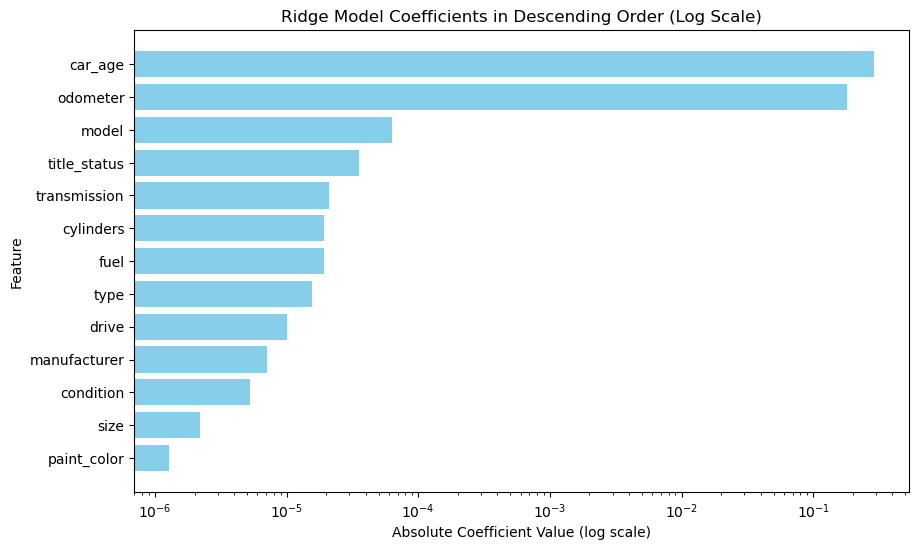

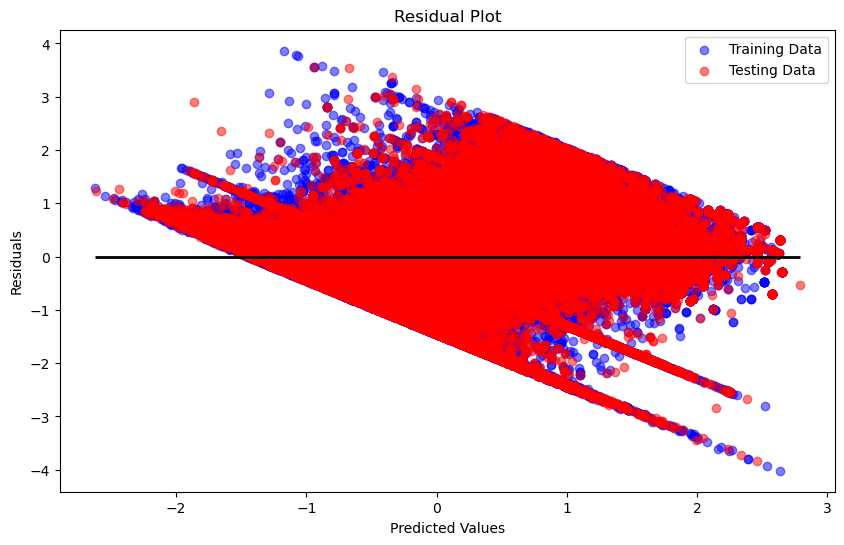

In [6]:
#Final apply alpha

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import TargetEncoder
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (Assuming 'vehicles.csv' is your dataset)
data_path = 'data/vehicles.csv'
car_data = pd.read_csv(data_path)

# Drop 'id', 'VIN', 'region', and 'state' columns
car_data = car_data.drop(['id', 'VIN', 'region', 'state'], axis=1)

# Create new feature 'car_age'
current_year = datetime.datetime.now().year
car_data['car_age'] = current_year - car_data['year']

# Drop the original 'year' column
car_data = car_data.drop('year', axis=1)

# Impute median for price where price is 0
median_price = car_data['price'].median()
car_data['price'] = car_data['price'].replace(0, median_price)

# Drop rows that are missing ALL feature values
car_cleaned = car_data.dropna(how='all', subset=['car_age', 'odometer', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'])

# Select numeric and categorical features
numeric_columns = car_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = car_cleaned.select_dtypes(include=['object']).columns

# Imputers for numeric and categorical features
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers to the respective columns using .loc to avoid SettingWithCopyWarning
car_cleaned.loc[:, numeric_columns] = numeric_imputer.fit_transform(car_cleaned.loc[:, numeric_columns])
car_cleaned.loc[:, categorical_columns] = categorical_imputer.fit_transform(car_cleaned.loc[:, categorical_columns])

# Remove outliers using IQR for numeric data
Q1 = car_cleaned[numeric_columns].quantile(0.25)
Q3 = car_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

car_output = car_cleaned[~((car_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | (car_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)].copy()

# Cast numeric columns to float64 to avoid dtype issues
car_output[numeric_columns] = car_output[numeric_columns].astype('float64')

# Target Encoding for categorical features
target_encoder = TargetEncoder()
car_output.loc[:, categorical_columns] = target_encoder.fit_transform(car_output[categorical_columns], car_output['price'])

# Standard scaling for numeric features
scaler = StandardScaler()
car_output.loc[:, numeric_columns] = scaler.fit_transform(car_output.loc[:, numeric_columns])

# Define the features and target variable
features = car_output.drop(columns=['price'])
target = car_output['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and fit the Ridge Regression model with alpha=10
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(ridge_model, features, target, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()

# Predict on the training and testing data
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error and R2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Ridge Regression Results with Alpha=10:")
print(f'MSE for training data: {train_mse:.2f}')
print(f'MSE for test data: {test_mse:.2f}')
print(f'R^2 score for training data: {train_r2:.2f}')
print(f'R^2 score for test data: {test_r2:.2f}')
print(f'Cross-Validation Mean MSE: {mean_cv_mse:.2f}')
print()

# Coefficients of the Ridge Regression model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})

# Sort the coefficients by the 'Coefficient' column in descending order
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print("Ridge Model Coefficients in Descending Order:")
print(sorted_coefficients)

# Using a logarithmic scale for better visual focus
sorted_coefficients['abs_coefficient'] = sorted_coefficients['Coefficient'].abs()
sorted_coefficients = sorted_coefficients.sort_values(by='abs_coefficient', ascending=False)

# Ridge coefficient plot with logarithmic scale
plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients['Feature'], sorted_coefficients['abs_coefficient'], color='skyblue')
plt.xscale('log')
plt.xlabel('Absolute Coefficient Value (log scale)')
plt.ylabel('Feature')
plt.title('Ridge Model Coefficients in Descending Order (Log Scale)')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficient on top
plt.show()

# Residual plot
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=.5, color='blue', label='Training Data')
plt.scatter(y_test_pred, residuals_test, alpha=.5, color='red', label='Testing Data')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='black', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()